In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_excel('Placement_Data_Full_Class.xlsx')
import seaborn as sns
dataset.head()

,sl_no,gender,10th%,10th Board,12th%,12th Board,Stream,Degree %,Degree Name,workex,Mock Test %,specialisation,Masters,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
4,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0


In [2]:
#data preprocessing
#col serial number and salary are irrelevant for our purpose so we drop them
dataset = dataset.drop('sl_no',axis=1)
dataset = dataset.drop('salary', axis=1)
dataset.head()


,gender,10th%,10th Board,12th%,12th Board,Stream,Degree %,Degree Name,workex,Mock Test %,specialisation,Masters,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
4,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed


In [3]:
dataset["gender"] = dataset["gender"].astype('category')
dataset["10th Board"] = dataset["10th Board"].astype('category')
dataset["12th Board"] = dataset["12th Board"].astype('category')
dataset["Degree Name"] = dataset["Degree Name"].astype('category')
dataset["specialisation"] = dataset["specialisation"].astype('category')
dataset["status"] = dataset["status"].astype('category')
dataset["Stream"] = dataset["Stream"].astype('category')
dataset["workex"] = dataset["workex"].astype('category')

In [4]:
dataset["gender"] = dataset["gender"].cat.codes
dataset["10th Board"] = dataset["10th Board"].cat.codes
dataset["12th Board"] = dataset["12th Board"].cat.codes
dataset["Degree Name"] = dataset["Degree Name"].cat.codes
dataset["specialisation"] = dataset["specialisation"].cat.codes
dataset["status"] = dataset["status"].cat.codes
dataset["Stream"] = dataset["Stream"].cat.codes
dataset["workex"] = dataset["workex"].cat.codes
dataset.head()

,gender,10th%,10th Board,12th%,12th Board,Stream,Degree %,Degree Name,workex,Mock Test %,specialisation,Masters,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
4,1,82.00,0,64.00,0,2,66.00,2,1,67.0,0,62.14,1


In [5]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2)
dataset.head()

,gender,10th%,10th Board,12th%,12th Board,Stream,Degree %,Degree Name,workex,Mock Test %,specialisation,Masters,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
4,1,82.00,0,64.00,0,2,66.00,2,1,67.0,0,62.14,1


In [7]:
# creating a classifier using sklearn
from sklearn.linear_model import LogisticRegression
 
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         max_iter=1000).fit(X_train,
                                            Y_train)
# printing the acc
clf.score(X_test, Y_test)

0.9302325581395349

In [8]:
# predicting for random value
clf.predict([[0, 87, 0, 95, 0, 2, 78, 2, 86, 0, 62,1]])

array([1], dtype=int8)

In [9]:
# creating a Y_pred for test data
Y_pred = clf.predict(X_test)
 
# display predicted values
Y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
      dtype=int8)

In [10]:
# evaluation of the classifier
from sklearn.metrics import confusion_matrix, accuracy_score
 
# display confusion matrix
print(confusion_matrix(Y_test, Y_pred))
 
# display accuracy
print(accuracy_score(Y_test, Y_pred))

[[ 5  0]
 [ 3 35]]
0.9302325581395349


In [11]:
dataset. columns

Index(['gender', '10th%', '10th Board', ' 12th%', '12th Board', 'Stream',
       'Degree %', 'Degree Name', 'workex', 'Mock Test %', 'specialisation',
       'Masters', 'status'],
      dtype='object')

In [12]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

# Create Decision Tree classifer object

clf = DecisionTreeClassifier()

 

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))


Accuracy: 0.9302325581395349


In [13]:
# creating a Y_pred for test data
Y_pred = clf.predict(X_test)

# display predicted values
Y_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
      dtype=int8)

In [14]:
# evaluation of the classifier
from sklearn.metrics import confusion_matrix, accuracy_score

# display confusion matrix
print(confusion_matrix(Y_test, Y_pred))

# display accuracy
print(accuracy_score(Y_test, Y_pred))


[[ 5  0]
 [ 7 31]]
0.8372093023255814


In [15]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, Y_train)

y_pred = regressor.predict(X_test)

regressor.score(X_train, Y_train)


0.9159545454545455

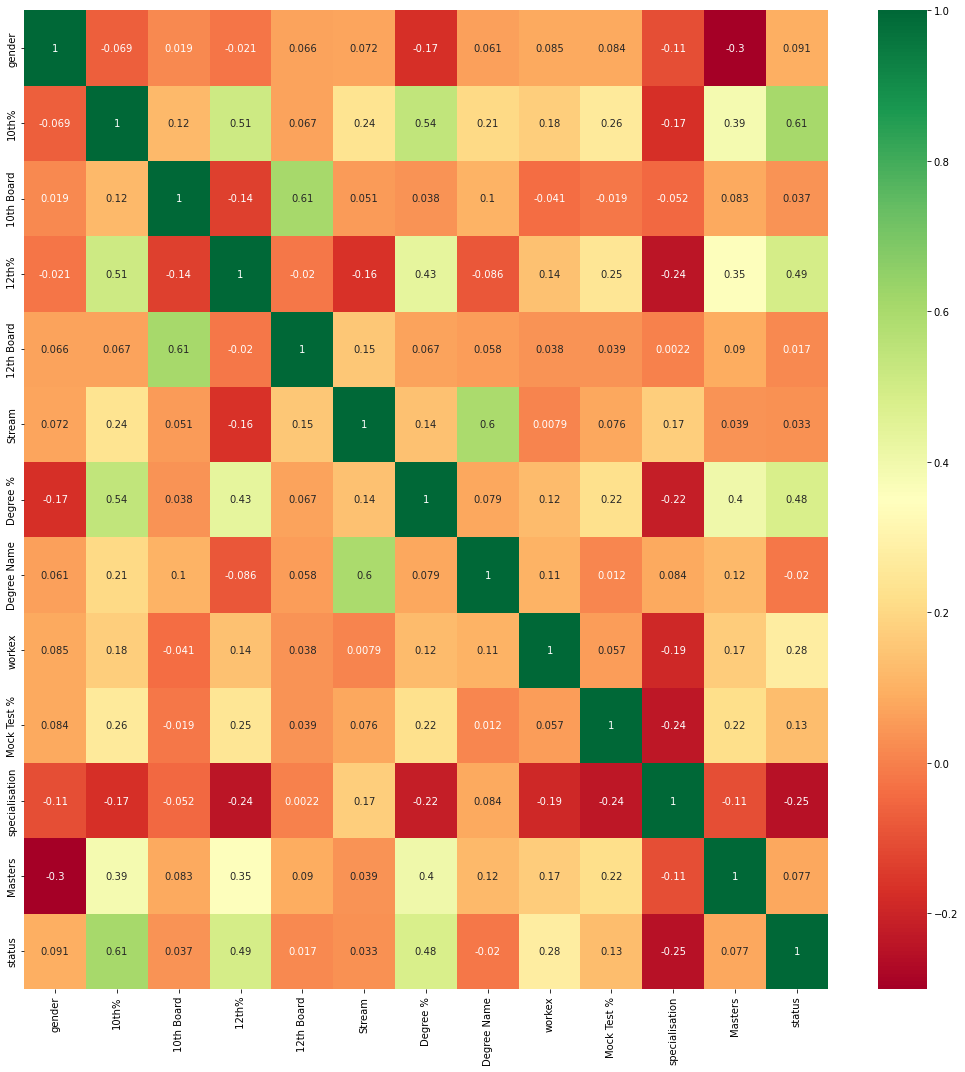

In [16]:
plt.figure(figsize = (18,18))
sns.heatmap(dataset.corr(), annot = True, cmap = "RdYlGn")

plt.show()